# Pymaceuticals Inc.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

file1 = "clinicaltrial_data.csv"
file2 = "mouse_drug_data.csv"

clinical_trial_data = pd.read_csv(file1)

In [77]:
mouse_drug_data = pd.read_csv(file2) 
# Start with 250 mice. 10 drugs. Give each drug to 25 mice. 
# 10 different drugs x 25 mice per drug = 250 rows in mouse_drug_data. 

__Merge Datasets__

In [78]:
merged_data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Volume Changes

In [79]:
# Sort by mouse id and timepoint in order to calculate tumor changes across timepoints.
sorted_data = merged_data.sort_values(by=['Mouse ID', 'Timepoint'])

In [80]:
# Calculate tumor change across timepoints. Store in tumor_changes list.

prior_mouse = ""
tumor_changes = []
tumor_percent_changes = []

for index, row in sorted_data.iterrows():
    if row[0] != prior_mouse:
        initial_tumor_volume = row[2]
        prior_tumor_volume = initial_tumor_volume
    
    tumor_increase_decrease = row[2] - prior_tumor_volume
    tumor_changes.append(tumor_increase_decrease)
    tumor_percent_changes.append(tumor_increase_decrease / initial_tumor_volume)
    
    prior_mouse = row[0]
    prior_tumor_volume = row[2]    

In [100]:
# Add column to dataframe
sorted_data['Tumor Change'] = tumor_changes
sorted_data['Tumor Change Percent'] = tumor_percent_changes

sorted_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug,Tumor Change,Tumor Change Percent
911,a203,0,45.000000,0,Infubinol,0.000000,0.000000
912,a203,5,48.508468,0,Infubinol,3.508468,0.077966
913,a203,10,51.852437,1,Infubinol,3.343969,0.074310
914,a203,15,52.777870,1,Infubinol,0.925433,0.020565
915,a203,20,55.173336,1,Infubinol,2.395466,0.053233


In [101]:
drug_timepoint_groupby = merged_data.groupby(['Drug', 'Timepoint'])

In [166]:
mean_tumor_volume = pd.DataFrame(drug_timepoint_groupby['Tumor Volume (mm3)'].mean()).reset_index()
mean_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [167]:
mean_tumor_volume_pivot = mean_tumor_volume.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
mean_tumor_volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [168]:
standard_error = pd.DataFrame(drug_timepoint_groupby['Tumor Volume (mm3)'].sem()).reset_index()
standard_error.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [169]:
standard_error_pivot = standard_error.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
standard_error_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


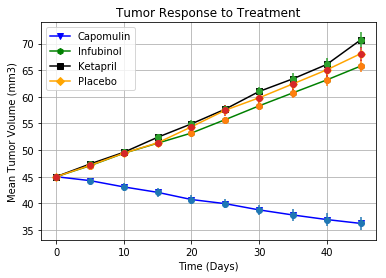

In [186]:
x_axis = list(np.arange(0, 50, 5))

y_axis = list(mean_tumor_volume_pivot['Capomulin'])
standard_errors = list(standard_error_pivot['Capomulin'])
plt.errorbar(x_axis, y_axis, standard_errors, fmt="o")
plt.plot(x_axis, y_axis, marker="v",color="blue", linewidth=1.5, label="Capomulin")

y_axis = list(mean_tumor_volume_pivot['Infubinol'])
standard_errors = list(standard_error_pivot['Infubinol'])
plt.errorbar(x_axis, y_axis, standard_errors, fmt="o")
plt.plot(x_axis, y_axis, marker="h",color="green", linewidth=1.5, label="Infubinol")

y_axis = list(mean_tumor_volume_pivot['Ketapril'])
standard_errors = list(standard_error_pivot['Ketapril'])
plt.errorbar(x_axis, y_axis, standard_errors, fmt="o")
plt.plot(x_axis, y_axis, marker="s",color="black", linewidth=1.5, label="Ketapril")

y_axis = list(mean_tumor_volume_pivot['Placebo'])
standard_errors = list(standard_error_pivot['Placebo'])
plt.errorbar(x_axis, y_axis, standard_errors, fmt="o")
plt.plot(x_axis, y_axis, marker="D",color="orange", linewidth=1.5, label="Placebo")

plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.legend()
plt.show()

In [87]:
# Filter for 4 drugs to analyze.
filtered_4_drugs = merged_data[(merged_data['Drug'] == 'Capomulin') |
                               (merged_data['Drug']== 'Infubinol') | 
                               (merged_data['Drug']== 'Ketapril') | 
                               (merged_data['Drug']== 'Placebo')]


## Number of Metastatic  Sites Changes

In [36]:
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug,Tumor Change,Tumor Change Percent
0,b128,0,45.000000,0,Capomulin,0.000000,0.000000
1,b128,5,45.651331,0,Capomulin,3.508468,0.077966
2,b128,10,43.270852,0,Capomulin,3.343969,0.074310
3,b128,15,43.784893,0,Capomulin,0.925433,0.020565
4,b128,20,42.731552,0,Capomulin,2.395466,0.053233


## Survival Rate

In [44]:
# Count of each Timepoint value indicates the number of mice that had a treatment at that timepoint (that day).
# If they didn't have a treatment at that timepoint, they died prior to that treatment.
# Only 100 mice (of the 250 mice) at treatment day 0 since filtering on the 4 drugs in the analysis.
num_alive = filtered_4_drugs.Timepoint.value_counts().values
x_limit = 50
x_axis = np.arange(0, x_limit, 5)

survival_df = pd.DataFrame ({
    "Treatment Day": x_axis,
    "# Mice Alive": num_alive
})
survival_df = survival_df.set_index("Treatment Day")
survival_df

,# Mice Alive
Treatment Day,
0,100
5,97
10,92
15,84
20,81
25,76
30,72
35,65
40,58
